**Plan**

**1. Introduction**<br>

**2. Segmentation of a time series**<br>
  - Optimal segmentation
  - Dynamic programming algorithm<br>

**3. Time series classification**<br>
  - Direct methods
  - Feature extraction-based methods

**4. Forecasting**

# **Introduction**

**<h2>Introduction to Time Series Analysis</h2>**

Time series analysis is a fundamental aspect of data science, focusing on analyzing data points collected or recorded at specific time intervals. These data points form a sequence where time is a crucial variable, often providing insights into trends, seasonal patterns, and other temporal dynamics. Common applications of time series analysis include economics, weather forecasting, stock market analysis, and many scientific and engineering fields.


**<h2>Key Concepts in Time Series Analysis</h2>**

1. **Segmentation of Time Series**
   - **Definition**: Time series segmentation involves dividing a time series into distinct, meaningful segments that can be analyzed independently. This can help in identifying patterns, changes, or anomalies within specific time frames.
   - **Optimal Segmentation**: Achieving the best possible division of the time series, which often requires advanced techniques to ensure segments are both meaningful and useful for further analysis.
   - **Dynamic Programming Algorithm**: This is a computational approach used to solve complex problems by breaking them down into simpler subproblems. In the context of time series segmentation, dynamic programming can efficiently find the optimal way to divide the series into segments.

2. **Classification of Time Series**
   - **Direct Methods**: These methods classify the entire time series without any transformation, relying directly on the raw data. They are often simple and quick but might not always capture the underlying patterns effectively.
   - **Feature Extraction-Based Methods**: These methods involve extracting significant features from the time series data before classification. This can include statistical measures, wavelet transforms, or other characteristics that help in more accurately identifying the nature of the time series.


**<h2>Importance and Applications</h2>**

Time series analysis is pivotal for understanding past behaviors and predicting future trends. For instance:
- **Economics**: Analyzing GDP, unemployment rates, and inflation trends.
- **Finance**: Stock prices, market indices, and financial forecasting.
- **Meteorology**: Weather pattern analysis and climate change studies.
- **Engineering**: Monitoring and predicting the behavior of systems over time, such as in manufacturing processes or network traffic.

Understanding and accurately analyzing time series data can lead to better decision-making, more accurate predictions, and a deeper understanding of temporal dynamics across various fields. As such, the techniques for segmenting and classifying time series are essential tools in the modern data scientist's toolkit.

# **Segmentation of a time series**

**<h2>Definition</h2>**

Segmentation of a time series is the process of dividing a time-ordered sequence of data points into distinct, meaningful segments or intervals, where each segment captures specific patterns, trends, or behaviors inherent to that interval. This technique is employed to simplify the analysis and interpretation of complex time series data by identifying homogeneous regions that exhibit similar characteristics, thus facilitating the detection of changes, trends, or anomalies within the dataset. Segmentation is a critical step in various applications such as identifying phases in economic cycles, detecting regime shifts in financial markets, and analyzing periods of interest in scientific and engineering data.

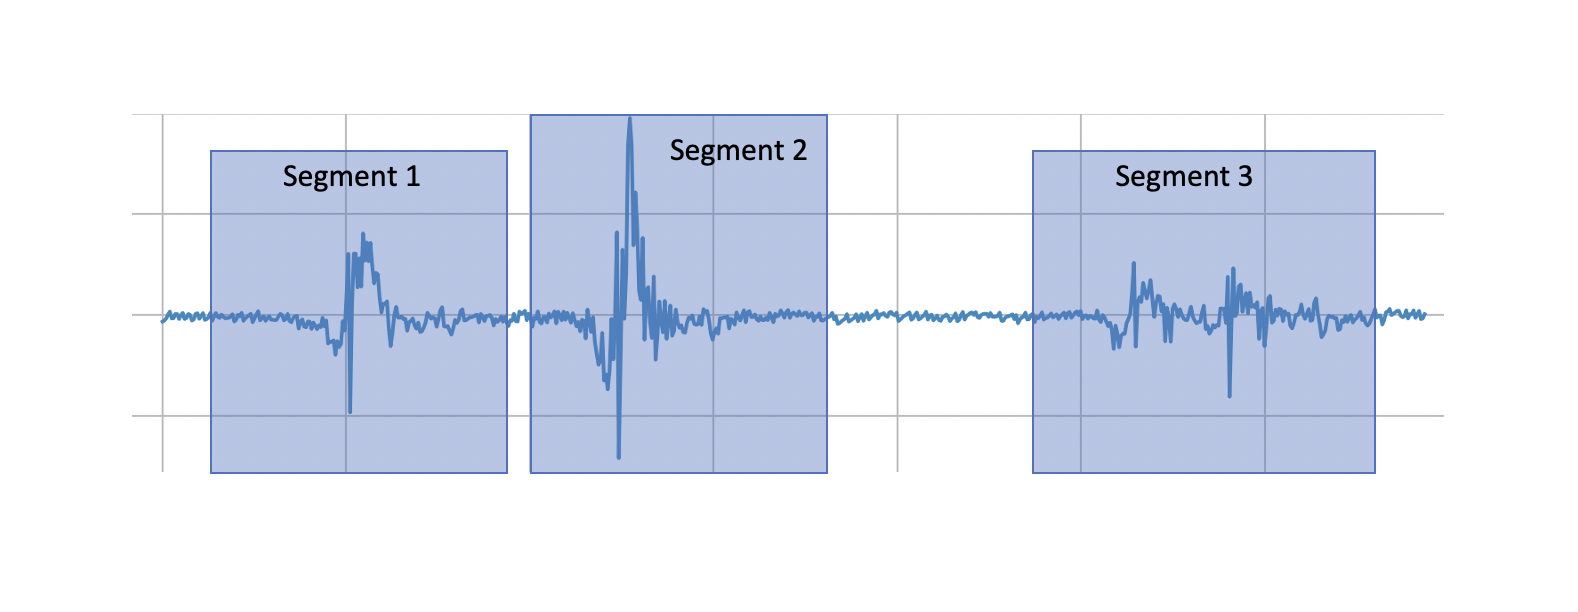

## **Optimal segmentation**

Optimal segmentation refers to the process of dividing a time series into the most meaningful and informative segments, such that the segmentation best captures the underlying structure and patterns in the data. This involves identifying the precise points in the time series where significant changes occur, ensuring that each segment is as homogeneous as possible with minimal intra-segment variability and maximal inter-segment differences. Achieving optimal segmentation often requires sophisticated algorithms, such as dynamic programming, to efficiently search through possible segmentations and select the one that best fits the data according to a predefined criterion, such as minimizing the sum of squared errors or maximizing the likelihood of a statistical model. Optimal segmentation is crucial in accurately detecting shifts, trends, and anomalies, thereby enhancing the interpretability and predictive power of time series analysis.

Optimal segmentation of a time series can be mathematically formulated as an optimization problem. One common approach involves minimizing the sum of squared errors (SSE) within each segment. Here is a basic mathematical formulation:

1. **Notation**:
   - Let $ \mathbf{y} = \{ y_1, y_2, \ldots, y_T \} $ be the time series data of length $ T $.
   - Let $ K $ be the number of segments.
   - Let $ \{ t_1, t_2, \ldots, t_{K+1} \} $ be the segment boundaries, with $ t_1 = 1 $ and $ t_{K+1} = T+1 $.

2. **Objective**:
   - The goal is to find the segment boundaries $ \{ t_2, \ldots, t_K \} $ that minimize the total sum of squared errors (SSE) within each segment.

3. **Sum of Squared Errors (SSE) for a segment**:
   - For a segment $ [t_i, t_{i+1}) $, the SSE is given by:$$SSE_i = \sum_{t=t_i}^{t_{i+1}-1} (y_t - \bar{y}_i)^2$$where $ \bar{y}_i $ is the mean of the data points in the $ i $-th segment:$$\bar{y}_i = \frac{1}{t_{i+1} - t_i} \sum_{t=t_i}^{t_{i+1}-1} y_t$$

4. **Total SSE**:
   - The total SSE over all segments is:$$\text{Total SSE} = \sum_{i=1}^{K} SSE_i$$

5. **Optimization Problem**:
   - The optimal segmentation minimizes the total SSE:$$\min_{\{t_2, \ldots, t_K\}} \sum_{i=1}^{K} \sum_{t=t_i}^{t_{i+1}-1} (y_t - \bar{y}_i)^2$$

6. **Dynamic Programming Solution**:
   - A dynamic programming approach can efficiently solve this problem. Define $ C(t, k)$ as the minimum total SSE for segmenting the first $ t $ data points into $ k $ segments.
   - The recurrence relation is:
     $$
     C(t, k) = \min_{s < t} \left[ C(s, k-1) + SSE_{(s, t)} \right]
     $$
     where $ SSE_{(s, t)} $ is the SSE for the segment from $ s $ to $ t $.

7. **Boundary Conditions**:
   - Initialize $ C(0, 0) = 0 $ and $ C(t, 0) = \infty $ for all $ t > 0 $.
   - The solution to the optimal segmentation problem is $ C(T, K) $, which gives the minimum SSE for segmenting the entire time series into $ K $ segments.

By implementing this dynamic programming approach, the optimal segmentation points $ \{ t_2, \ldots, t_K \} $ can be determined, yielding the segmentation that minimizes the total sum of squared errors.

In [ ]:
! pip install ruptures

Optimal segmentation points: [5, 10]


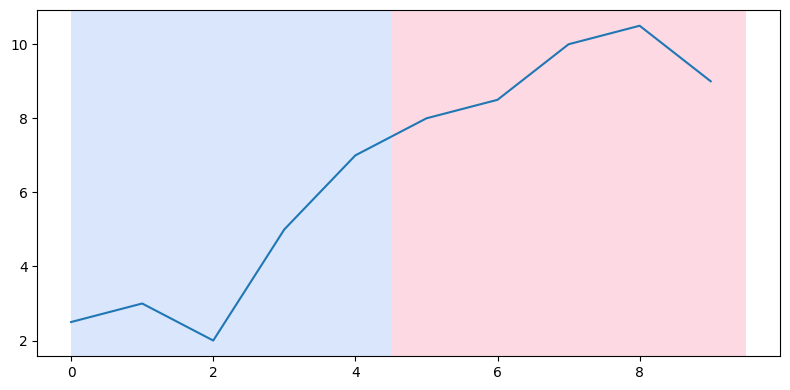

In [5]:
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

# Example time series
y = [2.5, 3.0, 2.0, 5.0, 7.0, 8.0, 8.5, 10.0, 10.5, 9.0]
y = np.array(y)

# Number of desired segments
K = 3

# Use the Pelt search method with a sum of squared error cost function
model = "l2"  # l2 norm for the SSE
algo = rpt.Pelt(model=model).fit(y)

# Predict the change points with the desired number of segments
result = algo.predict(pen=np.log(len(y)) * K)

# Display the results
print("Optimal segmentation points:", result)

# Visualization
rpt.display(y, result, figsize=(8, 4))
plt.show()


## **Dynamic programming algorithm**

A dynamic programming algorithm in time series is a computational approach used to solve complex problems by breaking them down into simpler, overlapping subproblems and solving each subproblem only once, storing its solution. In the context of time series segmentation, dynamic programming is employed to find the optimal way to partition a time series into segments that minimize a given cost function, such as the sum of squared errors (SSE) within each segment. By recursively calculating the optimal cost for each possible partition and storing these intermediate results, the algorithm efficiently determines the segmentation that best captures the underlying structure and patterns in the time series data, making it a powerful tool for time series analysis and change point detection.


1. **Initialization**:
   - Define `C[t][k]` as the minimum cost (e.g., sum of squared errors) of segmenting the first `t` data points into `k` segments.
   - Set `C[0][0] = 0` (base case, zero cost for zero data points and zero segments).
   - Initialize `C[t][0]` to infinity for all `t > 0` (infeasible to have segments without data).

2. **Precompute Costs**:
   - For each possible segment `[i, t]` where `0 ≤ i < t ≤ T`, compute the cost `cost(i, t)` for segmenting from index `i` to `t` (e.g., sum of squared errors).

3. **Dynamic Programming Recurrence**:
   - For `k = 1` to `K` (number of segments):
     - For `t = 1` to `T` (length of the time series):
      - Compute `C[t][k]` using the recurrence relation:
  $$C[t][k] = \min_{i < t} \left(C[i][k-1] + \text{cost}(i, t)\right)$$
       - Where `cost(i, t)` is the precomputed cost for the segment `[i, t]`.

4. **Backtracking**:
   - To find the optimal segmentation points, backtrack from `C[T][K]` to identify the boundaries of the segments:
     - Starting from `t = T` and `k = K`, trace back to find the segment boundaries using the values computed in `C` and the `cost` matrix.

5. **Output**:
   - The optimal segmentation is given by the segment boundaries found during backtracking.
   - The minimum total cost is `C[T][K]`.

This algorithm efficiently determines the optimal segmentation of a time series by breaking down the problem into manageable subproblems and using previously computed results to build up the final solution.

**Segmentation Methods**

**1. Fisher et Bellman**

**2. Hidden Markov Models (HMM)**

**3. Mixture Models**

**4. Online Segmentation Method**



# **Time series classification**

Time series classification is the process of assigning a time-ordered sequence of data points to predefined categories or labels based on its temporal patterns and characteristics. Unlike static data, time series data is characterized by its temporal dimension, where the sequence and the duration of data points can significantly influence the classification outcome. This task involves extracting relevant features from the time series, such as trends, seasonality, and other dynamic patterns, and applying machine learning or statistical models to classify the sequences into distinct categories. Time series classification is widely used in fields like finance, healthcare, and robotics for applications such as anomaly detection, activity recognition, and predictive maintenance.

## **Direct methods**

Direct methods of time series classification involve applying classification algorithms directly to the raw time series data without any intermediate transformation or feature extraction. These methods treat the entire time series as a single, unified input and typically use machine learning models such as nearest neighbors, decision trees, or deep learning architectures to classify the sequences. The raw time series data is fed into the classification model, which learns to recognize patterns and make predictions based on the temporal sequences of values. Direct methods are often straightforward and can leverage the sequential nature of the data, but they may require extensive computational resources and large amounts of data to effectively capture the temporal dependencies and variations inherent in the time series.

When clustering time series data, several classic clustering techniques and distance metrics can be used. Here’s an overview of these techniques and the associated distance metrics:

**1. Clustering Techniques**

**a. Hierarchical Clustering (CAH)**
Hierarchical clustering creates a tree of clusters (dendrogram) by either iteratively merging clusters (agglomerative) or splitting them (divisive). It can use various distance metrics to determine the similarity between time series.

**b. k-Means Clustering**
k-Means clustering partitions the data into `k` clusters by minimizing the within-cluster sum of squared distances from the cluster centroids. For time series, the centroid can be computed in different ways, such as averaging the series.

**c. Partitioning Around Medoids (PAM)**
PAM, also known as k-Medoids, is similar to k-Means but uses actual data points as cluster centers (medoids) rather than centroids. It minimizes the total dissimilarity within clusters.

---

**2. Distance Metrics**

**a. Euclidean Distance**
Euclidean distance is the straight-line distance between two points in a multidimensional space. For time series, it is computed point-wise:

$$
d_{\text{euclidean}}(X, Y) = \sqrt{\sum_{t=1}^T (x_t - y_t)^2}
$$

where $ X = \{x_1, x_2, \ldots, x_T\} $ and $ Y = \{y_1, y_2, \ldots, y_T\} $ are two time series of length $ T $.

**b. Correlation Distance**
Correlation distance measures the dissimilarity between time series based on their correlation. It is derived from the Pearson correlation coefficient:

$$
d_{\text{correlation}}(X, Y) = 1 - \text{corr}(X, Y)
$$

where $\text{corr}(X, Y)$ is the Pearson correlation coefficient between $X$ and $Y$.

**C. Dynamic Time Warping (DTW) Distance***

The DTW distance measures the similarity between two time series by calculating the minimum cumulative distance over all possible alignments. It accounts for shifts and distortions in time by finding the optimal match between two sequences.

Given two time series $x = \{x_1, x_2, \ldots, x_N\}$ and $y = \{y_1, y_2, \ldots, y_N\}$, the DTW distance $d_{\text{DTW}}(x, y)$ is defined as:

$$
d_{\text{DTW}}(x, y) = \min_{r \in R} \sum_{i=1}^{m} \left| x_{a_i} - y_{b_i} \right|^2
$$

where:

- $R$ is the set of all valid alignments $r = \{(a_1, b_1), (a_2, b_2), \ldots, (a_m, b_m)\}$.
- Each alignment $(a_i, b_i)$ satisfies:
  - $1 \leq a_i, b_i \leq N$
  - $a_1 = b_1 = 1$ (starting point)
  - $a_m = b_m = N$ (ending point)
  - $a_{i+1} \in \{a_i, a_i + 1\}$ and $b_{i+1} \in \{b_i, b_i + 1\}$ (monotonic, non-decreasing sequence)

In simpler terms, DTW finds the alignment path that minimizes the sum of squared differences between corresponding points in the sequences, while allowing for time shifts and distortions. This approach is particularly useful for comparing time series that may vary in speed or duration.


In [ ]:
! pip install tslearn

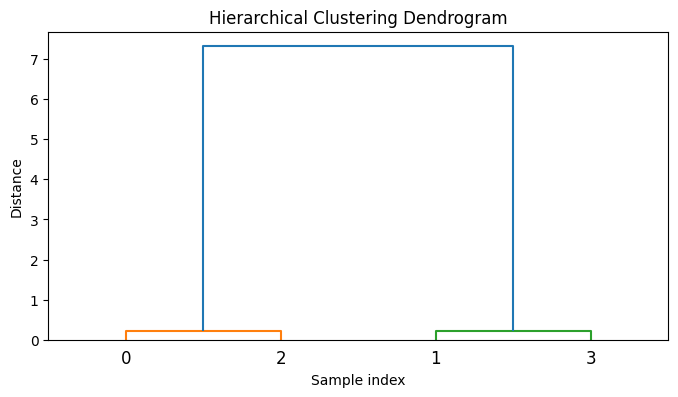

Cluster labels: [1 2 1 2]


In [12]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Example time series data
X = np.array([
    [2.5, 3.0, 2.0, 5.0, 7.0],
    [1.0, 1.5, 2.0, 2.5, 3.0],
    [2.6, 3.1, 2.1, 5.1, 7.1],
    [1.1, 1.6, 2.1, 2.6, 3.1]
])

# Perform hierarchical clustering
Z = linkage(X, method='ward', metric='euclidean')

# Create dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram into clusters
labels = fcluster(Z, t=2, criterion='maxclust')
print("Cluster labels:", labels)


In [13]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax

# Example time series data
X = np.array([
    [2.5, 3.0, 2.0, 5.0, 7.0],
    [1.0, 1.5, 2.0, 2.5, 3.0],
    [2.6, 3.1, 2.1, 5.1, 7.1],
    [1.1, 1.6, 2.1, 2.6, 3.1]
])

# Scale time series to the range [0, 1]
scaler = TimeSeriesScalerMinMax()
X_scaled = scaler.fit_transform(X)

# k-Means clustering with DTW metric
model = TimeSeriesKMeans(n_clusters=2, metric="dtw")
labels = model.fit_predict(X_scaled)
print("Cluster labels:", labels)


Cluster labels: [0 1 0 1]


## **Feature extraction-based methods**

Feature extraction-based methods for time series classification involve transforming the raw time series data into a set of meaningful features or descriptors that capture essential patterns, trends, and characteristics of the data. Instead of directly using the time series for classification, these methods first extract statistical, temporal, or domain-specific features, such as mean, variance, autocorrelation, or frequency components. These features serve as inputs to machine learning models, which then classify the time series based on the extracted characteristics. Feature extraction helps reduce the dimensionality of the data, enhances computational efficiency, and can improve classification performance by focusing on the most relevant aspects of the time series. This approach is particularly useful for handling complex, high-dimensional time series data where direct classification might be computationally prohibitive or less effective.

There are several methods:

1. **Fourier Series Decomposition-Based Classification**

2. **Wavelet-Based Classification**

3. **ARIMA Process-Based Classification**

4. **Functional Principal Component Analysis-Based Classification**

5. **SAX (Symbolic Aggregate approXimation) Approximation-Based Classification**

**<h2>Fourier Series Decomposition-Based Classification</h2>**

**Fourier Series Decomposition-Based Classification** in the context of time series classification involves analyzing and classifying time series data by transforming it into the frequency domain using Fourier series decomposition. This method decomposes a time series into a sum of sine and cosine functions of different frequencies, which allows the representation of the time series as a combination of periodic components. By analyzing the amplitude and phase of these frequency components, important patterns and features can be extracted. Classification is then performed based on these frequency-domain features, which often capture periodic behaviors and trends more effectively than raw time series data. This approach is particularly useful for identifying patterns in time series with strong cyclical or seasonal components, as it enables the classification algorithms to leverage frequency information that might be obscured in the time domain.

In Fourier Series Decomposition-Based Classification, the time series data is decomposed into its frequency components using Fourier series. This transformation allows for analyzing the time series in terms of its frequency content, which can be particularly useful for classification tasks.

**Fourier Series Decomposition**

For a given time series $ x(t) $, the Fourier series representation decomposes it into a sum of sinusoidal functions. Mathematically, this can be expressed as:

$$
x(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos\left(\frac{2 \pi n t}{T}\right) + b_n \sin\left(\frac{2 \pi n t}{T}\right) \right]
$$

where:
- $ a_0 $ is the mean of the time series.
- $ a_n $ and $ b_n $ are the Fourier coefficients for the cosine and sine terms, respectively.
- $ T $ is the period of the time series.
- $ n $ denotes the frequency component.

The Fourier coefficients $ a_n $ and $b_n$ are calculated as follows:

$$
a_n = \frac{2}{T} \int_0^T x(t) \cos\left(\frac{2 \pi n t}{T}\right) \, dt
$$
$$
b_n = \frac{2}{T} \int_0^T x(t) \sin\left(\frac{2 \pi n t}{T}\right) \, dt
$$

**Process for Classification**

1. **Transform the Time Series**: Decompose each time series into its Fourier components to obtain the coefficients $ a_n $ and $ b_n $.

2. **Feature Extraction**: Use the Fourier coefficients (or a subset of them) as features representing the time series. For classification purposes, you might use features such as the magnitudes of these coefficients or their patterns.

3. **Classification**: Apply a classification algorithm (e.g., support vector machines, k-nearest neighbors, etc.) to the extracted Fourier features to classify the time series into different categories.

**Example of Using Fourier Coefficients**

Consider a time series $ x(t) $ with a known period $ T $. The Fourier series decomposition allows you to extract key features from the time series data as follows:

- **Magnitude Spectrum**: Compute the magnitude of each frequency component:

$$
|X_n| = \sqrt{a_n^2 + b_n^2}
$$

- **Frequency Spectrum**: Use the magnitudes and phases to characterize the frequency content.

These features can then be used to train a machine learning model for classification tasks. By transforming the time series data into the frequency domain, the classification process can leverage periodic patterns and structures that might be challenging to identify directly in the time domain.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic time series data
def generate_time_series(n_samples, n_features, n_classes):
    X = []
    y = []
    t = np.linspace(0, 1, n_features)
    for i in range(n_samples):
        class_label = np.random.randint(0, n_classes)
        frequency = (class_label + 1) * 5  # Different frequencies for each class
        series = np.sin(2 * np.pi * frequency * t) + np.random.normal(scale=0.1, size=n_features)
        X.append(series)
        y.append(class_label)
    return np.array(X), np.array(y)

# Generate data
n_samples = 100
n_features = 100
n_classes = 3
X, y = generate_time_series(n_samples, n_features, n_classes)

# Apply Fourier Transform using numpy
X_transformed = np.fft.fft(X, axis=1)  # Compute the FFT along each time series

# Extract magnitude and phase features
magnitude_features = np.abs(X_transformed)[:, :n_features // 2]  # Magnitude of the first half of the frequencies
phase_features = np.angle(X_transformed)[:, :n_features // 2]  # Phase of the first half of the frequencies

# Combine magnitude and phase features
X_features = np.hstack((magnitude_features, phase_features))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Dimensionality reduction (optional, for visualization or efficiency)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = SVC(kernel='linear')  # Using a Support Vector Classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot example time series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(X[0], label='Time Series 1')
plt.title('Time Series 1')
plt.subplot(1, 2, 2)
plt.plot(X[1], label='Time Series 2')
plt.title('Time Series 2')
plt.legend()
plt.show()


**<h2>Wavelet-Based Classification</h2>**

**Wavelet-Based Classification** in the context of time series involves transforming the time series data into the wavelet domain using wavelet transforms to capture both time and frequency information. Unlike Fourier transforms that only provide frequency information, wavelet transforms offer a multi-resolution analysis by decomposing the time series into components that reflect different frequency bands localized in time. This allows for the detection of transient features, trends, and patterns that may occur at various scales and positions within the data. By extracting wavelet coefficients as features, the classification algorithms can leverage these rich, localized time-frequency characteristics to improve classification accuracy, particularly in cases where the time series exhibits non-stationary behavior with varying patterns over time.

Wavelet-based classification leverages the wavelet transform to analyze time series data in both time and frequency domains simultaneously. This approach is particularly useful for non-stationary signals where the frequency content may change over time.

**Wavelet Transform**

The Continuous Wavelet Transform (CWT) of a signal $ x(t) $ is defined as:

$$
W(a, b) = \int_{-\infty}^{\infty} x(t) \psi_{a,b}^*(t) \, dt
$$

where:
- $ \psi_{a,b}(t) $ is the wavelet function, which is generated by scaling and translating a mother wavelet $ \psi(t) $:
  $$
  \psi_{a,b}(t) = \frac{1}{\sqrt{a}} \psi\left(\frac{t - b}{a}\right)
  $$
  Here, $ a $ is the scale parameter (dilating or compressing the wavelet) and $ b $ is the translation parameter (shifting the wavelet in time).
- $ \psi_{a,b}^*(t) $ denotes the complex conjugate of $ \psi_{a,b}(t) $.

The CWT provides a time-scale representation of the signal, where $ W(a, b) $ represents the correlation between the wavelet at scale $ a $ and position $ b $ and the original signal $ x(t) $.

For practical purposes, the Discrete Wavelet Transform (DWT) is often used. The DWT decomposes the signal into a finite set of wavelet coefficients at different scales and positions.

**Discrete Wavelet Transform (DWT)**

The DWT of a discrete signal $ x[n] $ can be computed using the following equations:

$$
c_j[k] = \sum_{n} x[n] \psi_{j,k}[n]
$$

where:
- $ c_j[k] $ are the wavelet coefficients at scale $ j $ and position $ k $.
- $ \psi_{j,k}[n] $ is the discrete wavelet, derived from the mother wavelet $ \psi[n] $:
  $$
  \psi_{j,k}[n] = 2^{-j/2} \psi\left(2^{-j} n - k\right)
  $$

The DWT uses a filter bank approach to compute the wavelet coefficients, typically involving a series of high-pass and low-pass filters applied to the signal.

**Feature Extraction for Classification**

1. **Decomposition**: Decompose the time series using DWT to obtain wavelet coefficients at various scales and positions.
2. **Feature Selection**: Select relevant wavelet coefficients as features. This can include statistical measures such as means, variances, and energies of the coefficients at different scales.
3. **Classification**: Use these features to train a machine learning model, such as a support vector machine (SVM), decision tree, or neural network.

**Example of Wavelet Coefficient Extraction**

Given a time series $ x[n] $, the DWT can be applied to obtain coefficients that represent the signal at various scales and positions. These coefficients capture the time-frequency characteristics of the signal, which can then be used as input features for classification algorithms.

By using wavelet transforms, wavelet-based classification can effectively handle time series data with complex, non-stationary patterns, providing a powerful tool for time series analysis and classification.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic time series data
def generate_time_series(n_samples, n_features, n_classes):
    X = []
    y = []
    t = np.linspace(0, 1, n_features)
    for i in range(n_samples):
        class_label = np.random.randint(0, n_classes)
        frequency = (class_label + 1) * 5  # Different frequencies for each class
        series = np.sin(2 * np.pi * frequency * t) + np.random.normal(scale=0.1, size=n_features)
        X.append(series)
        y.append(class_label)
    return np.array(X), np.array(y)

# Generate data
n_samples = 100
n_features = 100
n_classes = 3
X, y = generate_time_series(n_samples, n_features, n_classes)

# Apply Wavelet Transform using pywt
def wavelet_features(X, wavelet='db1'):
    n_samples, n_features = X.shape
    wavelet = pywt.Wavelet(wavelet)
    max_level = pywt.dwt_max_level(n_features, wavelet.dec_len)

    X_transformed = []
    for i in range(n_samples):
        coeffs = pywt.wavedec(X[i], wavelet, level=max_level)
        # Flatten the list of coefficients and combine them
        X_transformed.append(np.hstack(coeffs))

    return np.array(X_transformed)

# Extract wavelet features
X_transformed = wavelet_features(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Dimensionality reduction (optional, for visualization or efficiency)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = SVC(kernel='linear')  # Using a Support Vector Classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot example time series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(X[0], label='Time Series 1')
plt.title('Time Series 1')
plt.subplot(1, 2, 2)
plt.plot(X[1], label='Time Series 2')
plt.title('Time Series 2')
plt.legend()
plt.show()


**<h2>ARIMA Process-Based Classification</h2>**

**ARIMA Process-Based Classification** involves using the AutoRegressive Integrated Moving Average (ARIMA) model to analyze and classify time series data. ARIMA models are statistical models that capture autocorrelations in the data by combining autoregressive (AR) terms, differencing (I for integration), and moving average (MA) terms. For classification, the time series data is first modeled using ARIMA to extract parameters that describe its underlying structure. These parameters, such as the coefficients of the AR and MA terms and the differencing order, serve as features for a classification algorithm. By leveraging the ARIMA model's ability to capture temporal dependencies and trends, ARIMA process-based classification can effectively differentiate between time series that exhibit distinct patterns, making it suitable for applications in various fields like finance, economics, and environmental science.

**ARIMA Process Mathematics**

The ARIMA (AutoRegressive Integrated Moving Average) model is used to describe time series data that may exhibit non-stationarity and autocorrelations. An ARIMA model is characterized by three parameters: $ p $, $ d $, and $ q $, where:
- $ p $ is the number of lag observations included in the model (autoregressive part).
- $ d $ is the number of times that the raw observations are differenced to make the time series stationary (differencing part).
- $ q $ is the size of the moving average window (moving average part).

**ARIMA Model Formulation**

The ARIMA model can be mathematically expressed as:

$$ y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} + \epsilon_t $$

where:
- $ y_t $ is the differenced time series value at time $ t $.
- $ c $ is a constant term.
- $ \phi_1, \phi_2, \ldots, \phi_p $ are the coefficients for the autoregressive terms.
- $ \theta_1, \theta_2, \ldots, \theta_q $ are the coefficients for the moving average terms.
- $ \epsilon_t $ is the white noise error term at time $ t $.

**Steps for ARIMA Process-Based Classification**

1. **Identification**:
   - Determine the order of differencing $ d $ needed to make the time series stationary.
   - Identify the appropriate values of $ p $ and $ q $ using tools like the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).

2. **Estimation**:
   - Estimate the coefficients $ \phi_i $ and $ \theta_j $ using methods such as maximum likelihood estimation or least squares.

3. **Diagnostics**:
   - Check the residuals of the model to ensure they resemble white noise.
   - Validate the model by checking for any remaining autocorrelations.

4. **Feature Extraction**:
   - Extract the ARIMA model parameters (e.g., $ \phi_i $, $ \theta_j $, and $ d $) as features.
   - Additional features can include the variance of the residuals, the Akaike Information Criterion (AIC), and other model selection criteria.

5. **Classification**:
   - Use the extracted ARIMA model parameters as input features for a classification algorithm (e.g., Support Vector Machine, Random Forest, Neural Network).


**<h2>Functional Principal Component Analysis-Based Classification</h2>**

**Functional Principal Component Analysis (FPCA)-Based Classification** is a method used to classify time series data by leveraging the principles of functional data analysis. In FPCA, time series are treated as continuous functions rather than discrete observations. This method involves decomposing the time series data into orthogonal basis functions using principal component analysis (PCA) applied to the functional form of the data. The principal components capture the most significant modes of variation in the data, reducing dimensionality while preserving essential information. These components are then used as features in a classification algorithm. FPCA-based classification is particularly useful when dealing with high-dimensional, smooth, and complex time series data, as it efficiently summarizes the data's inherent patterns and dynamics.

**Functional Data Representation**: In FPCA, each time series is viewed as a smooth function over a continuous domain, typically denoted as $ X(t) $, where $ t $ is time.

**Step 1: Centering the Data**: The first step is to center the functional data by subtracting the mean function, $ \mu(t) $, from each observation. The mean function is given by:
$$ \mu(t) = \frac{1}{N} \sum_{i=1}^N X_i(t) $
where $ X_i(t) $ represents the $ i $-th time series.

**Step 2: Covariance Function**: The covariance function $ C(s, t) $ captures the variability in the data:
$$ C(s, t) = \frac{1}{N} \sum_{i=1}^N (X_i(s) - \mu(s))(X_i(t) - \mu(t)) $$

**Step 3: Eigenfunction Decomposition**: The covariance function is then decomposed into its eigenfunctions $ \phi_k(t) $ and corresponding eigenvalues $ \lambda_k $. This involves solving the following integral equation:
$$ \int C(s, t) \phi_k(s) ds = \lambda_k \phi_k(t) $$
where $ \phi_k(t) $ are the orthonormal eigenfunctions and $ \lambda_k $ are the eigenvalues, representing the amount of variance explained by each eigenfunction.

**Step 4: Principal Component Scores**: Each time series $ X_i(t) $ is then projected onto the eigenfunctions to obtain the principal component scores:
$$ \xi_{ik} = \int (X_i(t) - \mu(t)) \phi_k(t) dt $$
These scores, \( \xi_{ik} \), represent the coefficients of the time series in the reduced eigenfunction space.

**Step 5: Feature Extraction for Classification**: The principal component scores $\xi_{ik}$ are used as features for classification. The truncated series representation of the time series using the first $K$ principal components is:
$$ X_i(t) \approx \mu(t) + \sum_{k=1}^K \xi_{ik} \phi_k(t) $$


In [ ]:
! pip install scikit-fda

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic time series data
def generate_time_series(n_samples, n_features, n_classes):
    X = []
    y = []
    t = np.linspace(0, 1, n_features)
    for i in range(n_samples):
        class_label = np.random.randint(0, n_classes)
        frequency = (class_label + 1) * 5  # Different frequencies for each class
        series = np.sin(2 * np.pi * frequency * t) + np.random.normal(scale=0.1, size=n_features)
        X.append(series)
        y.append(class_label)
    return np.array(X), np.array(y), t

# Generate data
n_samples = 100
n_features = 100
n_classes = 3
X, y, t = generate_time_series(n_samples, n_features, n_classes)

# Convert to FDataGrid
fd = FDataGrid(X, t)

# Perform FPCA
fpca = FPCA(n_components=5)
X_fpca = fpca.fit_transform(fd)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_fpca, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = SVC(kernel='linear')  # Using a Support Vector Classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot example time series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, X[0], label='Time Series 1')
plt.title('Time Series 1')
plt.subplot(1, 2, 2)
plt.plot(t, X[1], label='Time Series 2')
plt.title('Time Series 2')
plt.legend()
plt.show()

**<h2>SAX (Symbolic Aggregate approXimation) Approximation-Based Classification</h2>**

**SAX (Symbolic Aggregate approXimation) Approximation-Based Classification** is a method used to classify time series data by converting continuous time series into symbolic representations. SAX achieves this by first normalizing the time series, then segmenting it into equal-sized windows, and finally converting these segments into discrete symbols using a predetermined alphabet through Piecewise Aggregate Approximation (PAA). This symbolic transformation reduces the dimensionality and allows for the application of string-based data mining techniques. The symbolic representation captures the essential patterns and trends in the time series, making it easier to compare and classify different time series based on their symbolic sequences, thus enabling efficient and interpretable classification of complex time series data.

**1. Normalization:**

First, normalize the time series $ X(t) $ to ensure that it has zero mean and unit variance. If $ X(t) $ is a time series with $ n $ observations, then:

$$ \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i $$

$$ \sigma^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2 $$

The normalized time series $ Z(t) $ is given by:

$$ Z_i = \frac{X_i - \bar{X}}{\sigma} $$

**2. Segmentation:**

Divide the normalized time series $ Z(t) $ into $ w $ equal-sized segments. Let $ k $ be the length of each segment. The number of segments $ w $ is determined by the length $ n $ of the time series and the chosen segment length $ k $:

$$ w = \frac{n}{k} $$

**3. Piecewise Aggregate Approximation (PAA):**

For each segment $ j $, calculate the mean value to obtain the PAA representation. The mean of segment $ j $ is:

$$ \text{PAA}_j = \frac{1}{k} \sum_{i=(j-1)k+1}^{jk} Z_i $$

The PAA vector $ \text{PAA} $ is a vector of $ w $ means, representing the time series in a reduced form.

**4. Symbolic Transformation:**

Convert the PAA vector into a symbolic representation using a discretization procedure. Define $ a $ as the alphabet size. The PAA values are mapped to symbols by comparing each value with predefined thresholds, which are derived from the breakpoints of the normal distribution (or any other chosen distribution). If $ B_1, B_2, \ldots, B_{a-1} $ are the breakpoints, then each PAA value is mapped to a symbol $ \sigma_j $ such that:

$$ \sigma_j = \text{argmin}_{i} \left\{ \text{PAA}_j \leq B_i \right\} $$

**5. Symbolic Representation:**

The final SAX representation of the time series is a sequence of symbols $ \sigma $:

$$ \text{SAX} = (\sigma_1, \sigma_2, \ldots, \sigma_w) $$

**Mathematical Example:**

Assume we have a time series with 100 data points, and we decide to segment it into 10 segments.

1. **Normalization**: Compute the mean $ \bar{X} $ and standard deviation $ \sigma $, then normalize the series $ Z(t) $.
   
2. **Segmentation**: Divide the series into 10 segments, each with 10 data points.

3. **PAA Calculation**: Calculate the mean for each segment. If the means are $[0.5, -0.2, 0.1, \ldots]$, this forms the PAA vector.

4. **Symbolic Transformation**: Use breakpoints like $[-1, 0, 1]$ to map the PAA values to symbols, producing a sequence like $[A, B, C, \ldots]$.


# **Forecasting**

**Forecasting** is the process of predicting future values or trends based on historical data and observed patterns. It involves analyzing time series data or other relevant information to estimate future outcomes or events. Forecasting can be applied in various fields such as finance, economics, weather prediction, and inventory management. Techniques used in forecasting range from simple methods like moving averages to more complex models such as autoregressive integrated moving average (ARIMA) and machine learning algorithms. The goal of forecasting is to provide insights and help decision-making by estimating future conditions, trends, or values with a certain level of confidence.

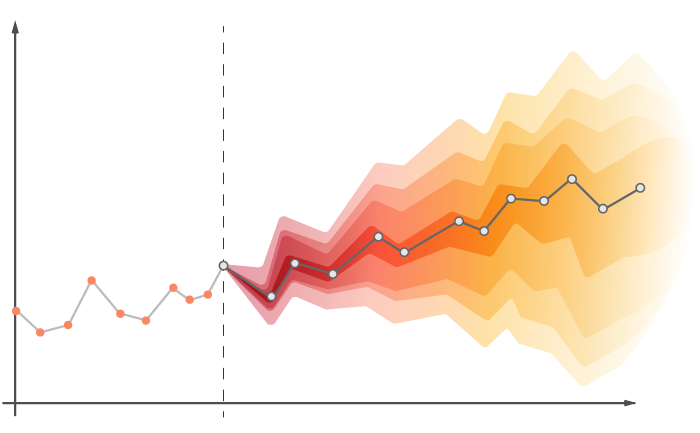

Here are some common forecasting methods:

1. **Moving Average**: Computes the average of historical data points over a fixed period to smooth out short-term fluctuations.
  
2. **Exponential Smoothing**: Weighs past observations exponentially, giving more importance to recent data.

3. **ARIMA (AutoRegressive Integrated Moving Average)**: A model that combines autoregression, differencing, and moving averages to capture temporal dependencies.

4. **Seasonal ARIMA (SARIMA)**: Extends ARIMA to handle seasonal variations in the data.

5. **Exponential Smoothing State Space Model (ETS)**: Models data using error, trend, and seasonality components.

6. **Prophet**: A model developed by Facebook that handles seasonality and holiday effects with a flexible, additive model.

7. **Long Short-Term Memory (LSTM)**: A type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data.

8. **Vector Autoregression (VAR)**: Extends autoregressive models to multiple time series to capture interdependencies among them.

9. **Gradient Boosting Machines (GBM)**: A machine learning method that builds models by combining the predictions of several base learners.

10. **Support Vector Machines (SVM)**: A machine learning technique that can be adapted for regression tasks to handle non-linear relationships in data.

**<h2>Moving Average</h2>**

**Moving Average Concept and Mathematics**

The **Moving Average (MA)** is a statistical technique used to analyze time series data by smoothing out short-term fluctuations and highlighting longer-term trends or cycles. There are different types of moving averages, but the most common ones are the Simple Moving Average (SMA) and the Weighted Moving Average (WMA).

**1. Simple Moving Average (SMA)**

**Definition**: The Simple Moving Average calculates the average of data points within a fixed window size. It is often used to smooth out time series data and observe trends.

**Mathematics**:

Let $ X_t $ represent the time series data at time $ t $, and $ w $ be the window size. The SMA at time $ t $ is given by:

$$ \text{SMA}_t = \frac{1}{w} \sum_{i=0}^{w-1} X_{t-i} $$

where:
- $ \text{SMA}_t $ is the value of the moving average at time $ t $,
- $ X_{t-i} $ are the data points within the window ending at $ t $,
- $ w $ is the number of periods over which the average is calculated.

**Example**: If you have a time series $ X = [10, 20, 30, 40, 50] $ and a window size $ w = 3 $, the SMA at time $ t = 3 $ (for the window ending at time 3) is:

$$ \text{SMA}_3 = \frac{1}{3} (X_3 + X_2 + X_1) = \frac{1}{3} (40 + 30 + 20) = 30 $$

**2. Weighted Moving Average (WMA)**

**Definition**: The Weighted Moving Average assigns different weights to data points within the window, giving more importance to some data points compared to others.

**Mathematics**:

Let $ X_t $ be the time series data at time $ t $, and $ w_i $ be the weight assigned to the $ i $-th data point in the window. The WMA at time $ t $ is:

$$ \text{WMA}_t = \frac{\sum_{i=0}^{w-1} w_i X_{t-i}}{\sum_{i=0}^{w-1} w_i} $$

where:
- $ \text{WMA}_t$ is the weighted moving average at time $ t $,
- $ w_i $ are the weights assigned to the data points,
- $ X_{t-i} $ are the data points within the weighted window.

**Example**: If you have the same time series $ X = [10, 20, 30, 40, 50] $ with weights $ w = [0.1, 0.3, 0.6] $, the WMA at time $ t = 3 $ (for the window ending at time 3) is:

$$$ \text{WMA}_3 = \frac{0.1 \cdot X_3 + 0.3 \cdot X_2 + 0.6 \cdot X_1}{0.1 + 0.3 + 0.6} = \frac{0.1 \cdot 40 + 0.3 \cdot 30 + 0.6 \cdot 20}{1.0} = \frac{4 + 9 + 12}{1} = 25 $$

**Summary**

- **Simple Moving Average (SMA)** smooths data by averaging data points within a fixed window size, giving equal weight to all points.
- **Weighted Moving Average (WMA)** assigns different weights to data points, allowing more recent or more relevant observations to have a greater impact on the average.

These methods help in understanding underlying trends and patterns in time series data, facilitating better forecasting and analysis.

**<h2>Exponential Smoothing</h2>**

**Exponential Smoothing** is a forecasting technique used to smooth time series data by applying weighted averages to past observations, with weights decreasing exponentially as the observations get older. This method is effective for capturing trends and seasonality in time series data while giving more importance to recent data points.

**1. Simple Exponential Smoothing (SES)**

**Definition**: Simple Exponential Smoothing is used for time series data without trend or seasonality. It calculates the forecast as a weighted average of past observations, with weights decreasing exponentially.

**Mathematics**:

Let $ X_t $ represent the observed value at time $ t $, and $ \alpha $ be the smoothing parameter (0 < $ \alpha $ < 1). The smoothed value $ S_t $ is given by:

$$ S_t = \alpha X_t + (1 - \alpha) S_{t-1} $$

where:
- $ S_t $ is the smoothed value (or forecast) at time $ t $,
- $ X_t $ is the observed value at time $ t $,
- $ S_{t-1} $ is the smoothed value at time $ t-1 $,
- $ \alpha $ is the smoothing constant, representing the weight of the most recent observation.

**Example**: Suppose you have a time series $ X = [30, 32, 31, 29, 35] $ and choose $ \alpha = 0.5 $. If the initial smoothed value \( S_1 \) is the first observation (30), the smoothed values are calculated as follows:

- $ S_2 = 0.5 \cdot X_2 + 0.5 \cdot S_1 = 0.5 \cdot 32 + 0.5 \cdot 30 = 31 $
- $ S_3 = 0.5 \cdot X_3 + 0.5 \cdot S_2 = 0.5 \cdot 31 + 0.5 \cdot 31 = 31 $
- $ S_4 = 0.5 \cdot X_4 + 0.5 \cdot S_3 = 0.5 \cdot 29 + 0.5 \cdot 31 = 30 $
- $ S_5 = 0.5 \cdot X_5 + 0.5 \cdot S_4 = 0.5 \cdot 35 + 0.5 \cdot 30 = 32.5 $

**2. Holt’s Linear Trend Model**

**Definition**: Holt’s Linear Trend Model extends simple exponential smoothing to handle linear trends in the time series. It involves smoothing both the level and the trend components.

**Mathematics**:

Let $ L_t $ be the level at time $ t $, $ T_t $ be the trend at time $ t $, and $ \alpha $ and $ \beta $ be the smoothing parameters for the level and trend, respectively. The model equations are:

$$ L_t = \alpha X_t + (1 - \alpha) (L_{t-1} + T_{t-1}) $$

$$ T_t = \beta (L_t - L_{t-1}) + (1 - \beta) T_{t-1} $$

The forecast for $ h $ periods ahead is:

$$ \hat{X}_{t+h} = L_t + h T_t $$

where:
- $ L_t $ is the smoothed level,
- $ T_t $ is the smoothed trend,
- $ \alpha $ is the level smoothing parameter,
- $ \beta $ is the trend smoothing parameter.

**Example**: Given time series $ X = [30, 32, 31, 29, 35] $, choose $ \alpha = 0.8 $ and $ \beta = 0.2 $. If the initial level $ L_1 $ is 30 and the initial trend $ T_1 $ is 2, the updated level and trend values are:

- $ L_2 = 0.8 \cdot 32 + 0.2 \cdot (30 + 2) = 30.4 $
- $ T_2 = 0.2 \cdot (30.4 - 30) + 0.8 \cdot 2 = 1.8 $
- Forecast for $ t+1 $:  $\hat{X}_{6} = 30.4 + 1.8 = 32.2 $

**3. Holt-Winters Seasonal Model**

**Definition**: Holt-Winters Seasonal Model extends Holt’s Linear Trend Model to handle seasonal variations. It includes components for level, trend, and seasonality.

**Mathematics**:

Let $ L_t $ be the level, $ T_t $ be the trend, $ S_t $ be the seasonal component, and $ \alpha $, $ \beta $, $ \gamma $ be the smoothing parameters. The model equations are:

$$ L_t = \alpha \frac{X_t}{S_{t-m}} + (1 - \alpha) (L_{t-1} + T_{t-1}) $$

$$ T_t = \beta (L_t - L_{t-1}) + (1 - \beta) T_{t-1} $$

$$ S_t = \gamma \frac{X_t}{L_t} + (1 - \gamma) S_{t-m} $$

The forecast for $ h $ periods ahead is:

$$ \hat{X}_{t+h} = (L_t + h T_t) S_{t+h-m} $$

where:
- $ S_{t-m} $ is the seasonal component from $ m $ periods ago,
- $ m $ is the length of the seasonal cycle.

**Example**: For monthly data with a yearly seasonality (12 months), if the seasonal component $ S_{t-12} $ for January is 1.1 and parameters $ \alpha = 0.5 $, $ \beta = 0.2 $, $ \gamma = 0.3 $ are chosen, the forecast for the next period is:

- Compute $ L_t $, $ T_t $, $ S_t $ as described, and use the seasonal component to adjust the forecast.

**Summary**

- **Simple Exponential Smoothing (SES)**: Forecasts using a weighted average where recent observations have higher weights.
- **Holt’s Linear Trend Model**: Extends SES to account for linear trends by smoothing both level and trend.
- **Holt-Winters Seasonal Model**: Further extends Holt’s model to handle seasonality, incorporating seasonal effects into the forecast.

**<h2>ARIMA (AutoRegressive Integrated Moving Average)</h2>**

**ARIMA (AutoRegressive Integrated Moving Average)** is a popular time series forecasting model that combines three components: autoregression (AR), differencing (I), and moving averages (MA). It is used for modeling and forecasting stationary time series data.

**1. Autoregressive (AR) Component**

**Definition**: The autoregressive component models the current value of the series as a linear combination of its past values. It captures the dependency between an observation and a specified number of lagged observations.

**Mathematics**:

The AR(p) model expresses the time series $X_t$ as:

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t
$$

where:
- $X_t$ is the value of the time series at time $t$,
- $\phi_1, \phi_2, \ldots, \phi_p$ are the autoregressive parameters,
- $p$ is the number of lags (order of the AR term),
- $\epsilon_t$ is the white noise error term.

**2. Integrated (I) Component**

**Definition**: The integrated component involves differencing the time series to make it stationary. This step is necessary if the time series exhibits trends or non-stationarity.

**Mathematics**:

If $d$ is the number of differencing steps required, the differenced series is:

$$
\Delta^d X_t = (1 - B)^d X_t
$$

where:
- $\Delta$ denotes the differencing operator,
- $B$ is the backshift operator, i.e., $B X_t = X_{t-1}$,
- $d$ is the order of differencing.

**3. Moving Average (MA) Component**

**Definition**: The moving average component models the current value of the series as a linear combination of past white noise error terms. It captures the relationship between an observation and the residual errors from a moving average model.

**Mathematics**:

The MA(q) model expresses the time series $X_t$ as:

$$
X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

where:
- $\mu$ is the mean of the series,
- $\theta_1, \theta_2, \ldots, \theta_q$ are the moving average parameters,
- $q$ is the number of lagged forecast errors in the model,
- $\epsilon_t$ is the white noise error term.

**4. ARIMA Model Combination**

**Definition**: An ARIMA(p, d, q) model combines the AR, I, and MA components. It is used to model a time series that requires differencing to achieve stationarity.

**Mathematics**:

The ARIMA(p, d, q) model combines the autoregressive, differencing, and moving average components as follows:

$$
(1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_p B^p) (1 - B)^d X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

where:
- $(1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_p B^p)$ is the autoregressive polynomial,
- $(1 - B)^d$ represents the differencing operator,
- $(\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q})$ is the moving average polynomial.

**Example**

Consider a time series with the following characteristics:
- $p = 1$ (AR term),
- $d = 1$ (1st differencing),
- $q = 1$ (MA term).

The ARIMA(1, 1, 1) model can be specified as:

$$
(1 - \phi_1 B) (1 - B) X_t = \epsilon_t + \theta_1 \epsilon_{t-1}
$$

After differencing the series once to achieve stationarity, fit the ARIMA model to estimate $\phi_1$ and $\theta_1$, and use the fitted model to forecast future values.

**Summary**

- **Autoregressive (AR) Component**: Models the relationship between the current value and past values.
- **Integrated (I) Component**: Involves differencing to make the time series stationary.
- **Moving Average (MA) Component**: Models the relationship between the current value and past errors.

The ARIMA model combines these components to handle a variety of time series forecasting scenarios, including non-stationarity and trends.

**<h2>SARIMA</h2>**

**Seasonal ARIMA (SARIMA)** is an extension of the ARIMA model that incorporates seasonal effects into the forecasting model. SARIMA models are used when time series data exhibit seasonal patterns, meaning that observations repeat over regular intervals (e.g., monthly or quarterly).

#### 1. Seasonal Autoregressive (SAR) Component

**Definition**: The seasonal autoregressive component models the relationship between the current value and past values at seasonal lags. It captures the dependence of observations on previous observations separated by seasonal periods.

**Mathematics**:

The SAR component is represented as:

$$
\Phi(B^s) X_t = \epsilon_t
$$

where:
- $\Phi(B^s)$ is the seasonal autoregressive polynomial with order $P$,
- $B^s$ is the seasonal backshift operator, with $s$ representing the length of the seasonal cycle (e.g., $s = 12$ for monthly data with yearly seasonality),
- $P$ is the seasonal autoregressive order.

#### 2. Seasonal Moving Average (SMA) Component

**Definition**: The seasonal moving average component models the current value as a linear combination of past white noise error terms at seasonal lags. It captures the impact of past forecast errors on the current observation.

**Mathematics**:

The SMA component is represented as:

$$
\Theta(B^s) \epsilon_t = \epsilon_t
$$

where:
- $\Theta(B^s)$ is the seasonal moving average polynomial with order $Q$,
- $B^s$ is the seasonal backshift operator,
- $Q$ is the seasonal moving average order.

#### 3. Seasonal Differencing

**Definition**: Seasonal differencing is used to make the time series stationary by removing seasonal trends and patterns. It involves subtracting the value of the time series from the value at the same point in the previous seasonal cycle.

**Mathematics**:

The seasonal differencing is represented as:

$$
(1 - B^s) X_t
$$

where:
- $B^s$ is the seasonal backshift operator,
- $s$ is the seasonal period.

#### 4. Seasonal ARIMA (SARIMA) Model Combination

**Definition**: The SARIMA(p, d, q)(P, D, Q)_s model combines non-seasonal and seasonal components to handle both trend and seasonal variations.

**Mathematics**:

The SARIMA(p, d, q)(P, D, Q)_s model is specified as:

$$
(1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_p B^p)(1 - B^s)^D X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

where:
- $(1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_p B^p)$ is the non-seasonal autoregressive polynomial,
- $(1 - B^s)^D$ represents seasonal differencing of order $D$,
- $(\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q})$ is the non-seasonal moving average polynomial,
- $(1 - \Phi_1 B^s - \Phi_2 B^{2s} - \cdots - \Phi_P B^{Ps})$ is the seasonal autoregressive polynomial,
- $(1 - \Theta_1 B^s - \Theta_2 B^{2s} - \cdots - \Theta_Q B^{Qs})$ is the seasonal moving average polynomial.

### Example

Consider a time series with yearly seasonality ($s = 12$) and the following parameters:
- Non-seasonal AR order $p = 1$
- Non-seasonal differencing $d = 1$
- Non-seasonal MA order $q = 1$
- Seasonal AR order $P = 1$
- Seasonal differencing $D = 1$
- Seasonal MA order $Q = 1$

The SARIMA(1, 1, 1)(1, 1, 1)_12 model can be specified as:

$$
(1 - \phi_1 B)(1 - B^12) X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \Phi_1 \epsilon_{t-12} + \Theta_1 \epsilon_{t-12}
$$

where:
- $\phi_1$ is the non-seasonal AR parameter,
- $\theta_1$ is the non-seasonal MA parameter,
- $\Phi_1$ is the seasonal AR parameter,
- $\Theta_1$ is the seasonal MA parameter.

**Summary**

- **Seasonal Autoregressive (SAR) Component**: Models the dependence on past observations at seasonal lags.
- **Seasonal Moving Average (SMA) Component**: Models the influence of past forecast errors at seasonal lags.
- **Seasonal Differencing**: Removes seasonal patterns to make the series stationary.
- **SARIMA Model**: Combines non-seasonal and seasonal components to handle complex time series with both trend and seasonal effects.

SARIMA models are well-suited for time series data that exhibit both trend and seasonality, providing a comprehensive approach to forecasting such data.

**<h2>Applications</h2>**

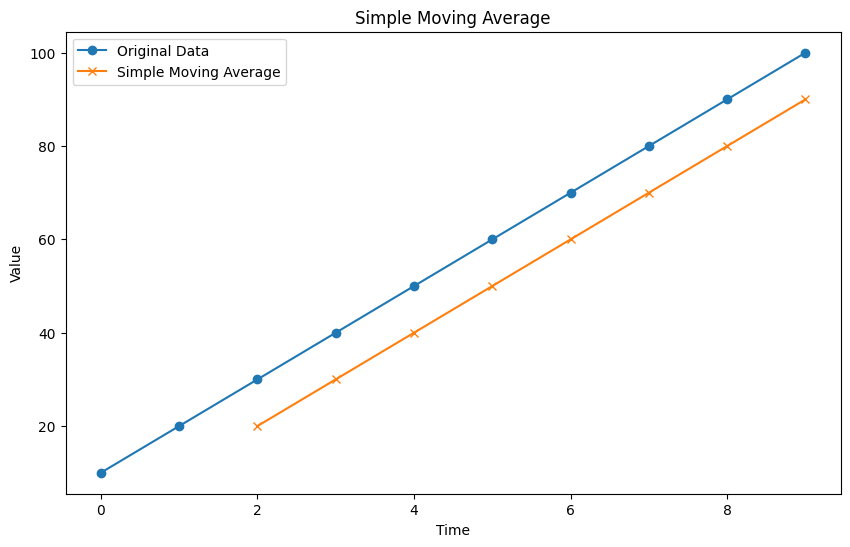

In [41]:
# Simple Moving Average
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Compute Simple Moving Average with a window size of 3
window_size = 3
sma = data.rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(sma, label='Simple Moving Average', marker='x')
plt.legend()
plt.title('Simple Moving Average')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

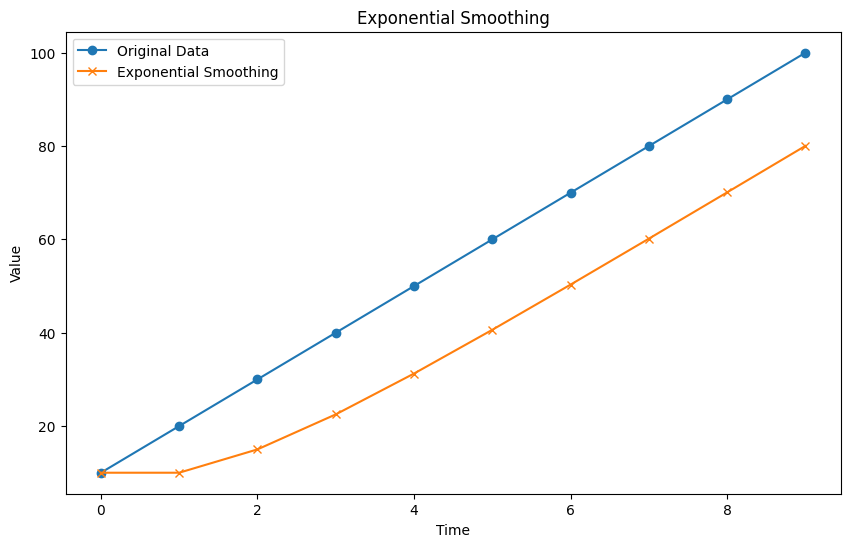

In [42]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(data)
fit = model.fit(smoothing_level=0.5, optimized=False)

# Get the fitted values
fitted_values = fit.fittedvalues

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(fitted_values, label='Exponential Smoothing', marker='x')
plt.legend()
plt.title('Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


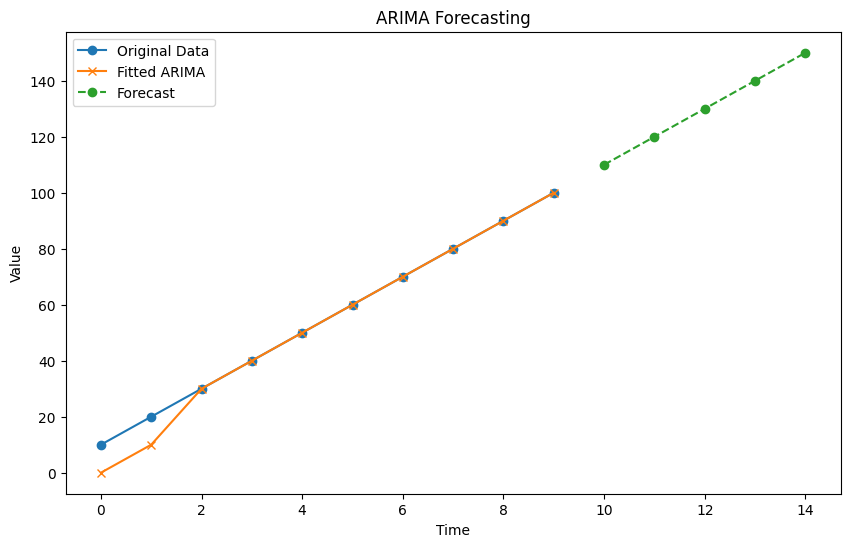

In [43]:
# ARIMA (AutoRegressive Integrated Moving Average)
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Fit the ARIMA model
model = ARIMA(data, order=(1, 1, 1))
fit = model.fit()

# Forecast future values
forecast = fit.predict(start=len(data), end=len(data) + 4, typ='levels')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(fit.fittedvalues, label='Fitted ARIMA', marker='x')
plt.plot(forecast, label='Forecast', marker='o', linestyle='--')
plt.legend()
plt.title('ARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


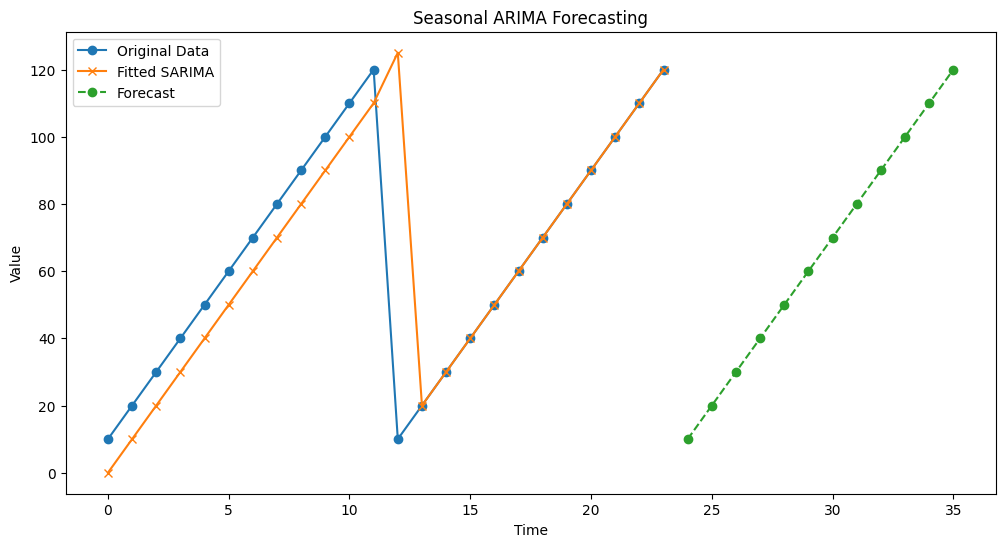

In [44]:
# Seasonal ARIMA (SARIMA)
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120] * 2)  # Example with seasonality

# Fit the SARIMA model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit = model.fit()

# Forecast future values
forecast = fit.get_forecast(steps=12).predicted_mean

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(fit.fittedvalues, label='Fitted SARIMA', marker='x')
plt.plot(pd.Series(forecast, index=range(len(data), len(data) + 12)), label='Forecast', marker='o', linestyle='--')
plt.legend()
plt.title('Seasonal ARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()
